In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline


Let's load the csv files and merge them to a single dataframe

In [2]:
df1 = pd.read_csv("C:/Users/vaddi/OneDrive/Desktop/assignment/table1.csv")
df2 = pd.read_csv("C:/Users/vaddi/OneDrive/Desktop/assignment/table2.csv")
df3 = pd.read_csv("C:/Users/vaddi/OneDrive/Desktop/assignment/table3.csv")

In [3]:
merged_Df = pd.merge(df1,df2, on='Unnamed: 0', how='outer')

In [4]:
#Let's merge all 3 datasets to one
Final_merged_Df = pd.merge(merged_Df, df3, on = 'Unnamed: 0', how='outer')

In [5]:
Final_merged_Df

Unnamed: 0                         Name  No_of_Colors Category  \
0              0         Nike Air Force 1 '07             2     Men    
1              1  Nike Air Force 1 '07 EasyOn             1   Women    
2              2             Nike Gamma Force             4   Women    
3              3         Nike Air Force 1 '07             5   Women    
4              4          Air Jordan 1 Low SE             2   Women    
...          ...                          ...           ...      ...   
2021        2021          VL Court Base Shoes             2      Men   
2022        2022             Gazelle 85 Shoes             2      Men   
2023        2023                 Heawyn Shoes             2      Men   
2024        2024         Ultraboost 1.0 Shoes             6    Women   
2025        2025         Ultraboost 1.0 Shoes             8    Women   

           Price Sizes                               color1  \
0       7 495.00     6  Barely Rose/Pink Oxford/Barely Rose   
1       9 695.00     8                    Black/Black/White   
2       8 495.00     7     Sand Drift/Phantom/Metallic Gold   
3       8 195.00     8            White/White/Metallic Gold   
4      10 295.00     5             Black/Summit White/Black   
...          ...   ...                                  ...   
2021    4 599.00   NaN                                  NaN   
2022    6 599.00   NaN                                  NaN   
2023    9 999.00   NaN                                  NaN   
2024   21 999.00   NaN                                  NaN   
2025   19 999.00   NaN                                  NaN   

                                color2                            color3  \
0                    Black/Black/White  Sand Drift/Phantom/Metallic Gold   
1     Sand Drift/Phantom/Metallic Gold         White/White/Metallic Gold   
2            White/White/Metallic Gold          Black/Summit White/Black   
3             Black/Summit White/Black                                 -   
4                                    -                                 -   
...                                ...                               ...   
2021                               NaN                               NaN   
2022                               NaN                               NaN   
2023                               NaN                               NaN   
2024                               NaN                               NaN   
2025                               NaN                               NaN   

                         color4                    color5 product code  \
0     White/White/Metallic Gold  Black/Summit White/Black   BQ4632-108   
1      Black/Summit White/Black                         -   BQ4639-012   
2                             -                         -   DX5575-800   
3                             -                         -   CN9675-401   
4                             -                         -   CN9677-006   
...                         ...                       ...          ...   
2021                        NaN                       NaN          NaN   
2022                        NaN                       NaN          NaN   
2023                        NaN                       NaN          NaN   
2024                        NaN                       NaN          NaN   
2025                        NaN                       NaN          NaN   

     Reviews Size Comfort Durability Ratings  
0         70    -       -          -     4.7  
1        168    -       -          -     4.8  
2         96    -       5          -     4.4  
3        324    -       4          -     4.7  
4        131    -       3          -     4.6  
...      ...  ...     ...        ...     ...  
2021     NaN  NaN     NaN        NaN     NaN  
2022     NaN  NaN     NaN        NaN     NaN  
2023     NaN  NaN     NaN        NaN     NaN  
2024     NaN  NaN     NaN        NaN     NaN  
2025     NaN  NaN     NaN        NaN     NaN  

[2026 rows x 17 c

In [6]:
#Let's see the top 5 rows of the dataset
Final_merged_Df.head()

Unnamed: 0                         Name  No_of_Colors Category      Price  \
0           0         Nike Air Force 1 '07             2     Men    7 495.00   
1           1  Nike Air Force 1 '07 EasyOn             1   Women    9 695.00   
2           2             Nike Gamma Force             4   Women    8 495.00   
3           3         Nike Air Force 1 '07             5   Women    8 195.00   
4           4          Air Jordan 1 Low SE             2   Women   10 295.00   

  Sizes                               color1  \
0     6  Barely Rose/Pink Oxford/Barely Rose   
1     8                    Black/Black/White   
2     7     Sand Drift/Phantom/Metallic Gold   
3     8            White/White/Metallic Gold   
4     5             Black/Summit White/Black   

                             color2                            color3  \
0                 Black/Black/White  Sand Drift/Phantom/Metallic Gold   
1  Sand Drift/Phantom/Metallic Gold         White/White/Metallic Gold   
2         White/White/Metallic Gold          Black/Summit White/Black   
3          Black/Summit White/Black                                 -   
4                                 -                                 -   

                      color4                    color5 product code Reviews  \
0  White/White/Metallic Gold  Black/Summit White/Black   BQ4632-108      70   
1   Black/Summit White/Black                         -   BQ4639-012     168   
2                          -                         -   DX5575-800      96   
3                          -                         -   CN9675-401     324   
4                          -                         -   CN9677-006     131   

  Size Comfort Durability Ratings  
0    -       -          -     4.7  
1    -       -          -     4.8  
2    -       5          -     4.4  
3    -       4          -     4.7  
4    -       3          -     4.6

In [7]:
#Let's check the number of rows and columns present in the dataframe
Final_merged_Df.shape

(2026, 17)

The dataset contains 2026 rows and 17 columns

# Problem Statement is to make predictions of price and star rating .

Let's check if there are any duplicate rows present in the dataset and drop them

In [8]:
#Dropping the duplicate rows if there are any
df = Final_merged_Df.drop_duplicates()

In [9]:
#Let's check the shape of the dataset after removing the duplicates
df.shape

(2026, 17)

In [10]:
#Let's check  if there are any null values present in the dataset
df.isnull().sum()

Unnamed: 0        0
Name              0
No_of_Colors      0
Category          0
Price             0
Sizes           865
color1          865
color2          865
color3          865
color4          865
color5          865
product code    865
Reviews         855
Size            855
Comfort         856
Durability      855
Ratings         855
dtype: int64

It is observed that there are above 855 null values present in each row except for Name, no_of_colors, category and price columns

In [11]:
#Let's check for the number of unique values present in each column of the dataset
for i in df.columns:
    u=df[i].nunique()
    print("Unique values in", i,'are :',u )
    print("*"*30)

Unique values in Unnamed: 0 are : 2026
******************************
Unique values in Name are : 1478
******************************
Unique values in No_of_Colors are : 15
******************************
Unique values in Category are : 104
******************************
Unique values in Price are : 365
******************************
Unique values in Sizes are : 27
******************************
Unique values in color1 are : 461
******************************
Unique values in color2 are : 378
******************************
Unique values in color3 are : 300
******************************
Unique values in color4 are : 237
******************************
Unique values in color5 are : 195
******************************
Unique values in product code are : 529
******************************
Unique values in Reviews are : 209
******************************
Unique values in Size are : 2
******************************
Unique values in Comfort are : 29
******************************
Unique values 

In [12]:
#Let's delete the unwanted and the columns with no data, from the dataset 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
#Let's check the columns present in the dataset
df.columns

Index(['Name', 'No_of_Colors', 'Category', 'Price', 'Sizes', 'color1',
       'color2', 'color3', 'color4', 'color5', 'product code', 'Reviews',
       'Size', 'Comfort', 'Durability', 'Ratings'],
      dtype='object')

In [14]:
#Let's check for the data type of each column in the dataset
df.dtypes

Name            object
No_of_Colors     int64
Category        object
Price           object
Sizes           object
color1          object
color2          object
color3          object
color4          object
color5          object
product code    object
Reviews         object
Size            object
Comfort         object
Durability      object
Ratings         object
dtype: object

In [15]:
#Let's check the value counts in each column of the dataset

for i in df.columns:
    v=df[i].value_counts()
    print("The value counts of ", i, "are:", v)
    print("*"*30)

The value counts of  Name are: Ultraboost Light Shoes                                                   17
Ultraboost 1.0 Shoes                                                     12
Nike Air Force 1 '07                                                     11
Nike Dunk Low                                                            11
Air Jordan 1 Low SE                                                      10
                                                                         ..
PUMA x CIELE Fast-R NITRO™ Elite Men's Running ShoesDusty Tan             1
Cell Rapid Running ShoesFor All Time Red-PUMA Black                       1
ST Runner v3 L Men's SneakersPuma Black-Puma Black-Gum                    1
PUMA HOOPS x GREMLINS All Pro NITRO™ Men's Basketball ShoesPUMA White     1
Heawyn Shoes                                                              1
Name: Name, Length: 1478, dtype: int64
******************************
The value counts of  No_of_Colors are: 1     872
2     505
3   

It is observed that the size column is empty. Hence dropping the Size column

In [16]:
#It is observed that the 'Size ' column is empty
df.drop('Size', axis=1, inplace=True)

<AxesSubplot:>

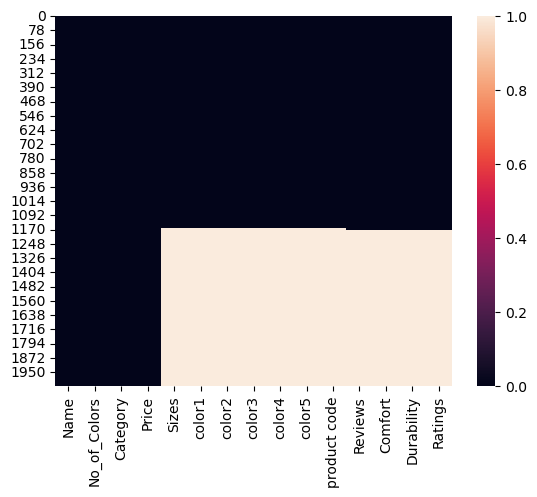

In [17]:
#Graphical representation of the null values in the dataset
sns.heatmap(df.isnull())

In [18]:
#Deleting the rows that contains null values
df_ = df.dropna()

In [19]:
df_

Name  No_of_Colors  \
0                                  Nike Air Force 1 '07             2   
1                           Nike Air Force 1 '07 EasyOn             1   
2                                      Nike Gamma Force             4   
3                                  Nike Air Force 1 '07             5   
4                                   Air Jordan 1 Low SE             2   
...                                                 ...           ...   
1156  Velocity NITRO™ 2 Men's Running ShoesFire Orch...             2   
1157  RS-X Efekt RE:PLACE Men's SneakersFrosted Ivor...             1   
1158  SCUDERIA FERRARI x JOSHUA VIDES RS Trck Men's ...             1   
1159  Suede Cassette Tape Men's SneakersPUMA Black-F...             1   
1160  PUMA x CHILDHOOD DREAMS Velophasis Men's Sneak...             1   

     Category      Price Sizes                               color1  \
0        Men    7 495.00     6  Barely Rose/Pink Oxford/Barely Rose   
1      Women    9 695.00     8                    Black/Black/White   
2      Women    8 495.00     7     Sand Drift/Phantom/Metallic Gold   
3      Women    8 195.00     8            White/White/Metallic Gold   
4      Women   10 295.00     5             Black/Summit White/Black   
...       ...        ...   ...                                  ...   
1156      Men        120    12  Alpine Snow-Ultra Blue-Yellow Burst   
1157      Men        130    12  Alpine Snow-Ultra Blue-Yellow Burst   
1158      Men        130    12  Alpine Snow-Ultra Blue-Yellow Burst   
1159      Men      49.99     9  Alpine Snow-Ultra Blue-Yellow Burst   
1160      Men        130    10             Cool Dark Gray-Koral Ice   

                                color2                            color3  \
0                    Black/Black/White  Sand Drift/Phantom/Metallic Gold   
1     Sand Drift/Phantom/Metallic Gold         White/White/Metallic Gold   
2            White/White/Metallic Gold          Black/Summit White/Black   
3             Black/Summit White/Black                                 -   
4                                    -                                 -   
...                                ...                               ...   
1156               Icy Blue-Ultra Blue          PUMA White-Cherry Tomato   
1157               Icy Blue-Ultra Blue          PUMA White-Cherry Tomato   
1158          Whisper White-ARUBA BLUE       PUMA Black-Intense Lavender   
1159                   Puma Black-Gold          Cherry Tomato-PUMA Black   
1160            Island Pink-PUMA White          Cherry Tomato-PUMA Black   

                                     color4  \
0                 White/White/Metallic Gold   
1                  Black/Summit White/Black   
2                                         -   
3                                         -   
4                                         -   
...                                     ...   
1156  PUMA Black-Cool Dark Gray-PUMA Silver   
1157            Platinum Gray-Platinum Gray   
1158       PUMA Black-Koral Ice-Speed Green   
1159                 Dark Jasper-Warm White   
1160     Koral Ice-Cool Mid Gray-PUMA Black   

                                               color5 product code Reviews  \
0                            Black/Summit White/Black   BQ4632-108      70   
1                                                   -   BQ4639-012     168   
2                                                   -   DX5575-800      96   
3                                                   -   CN9675-401     324   
4                                                   -   CN9677-006     131   
...                                               ...          ...     ...   
1156  Active Red-Ocean Tropic-Lime Pow\n: Coming Soon    393772_02           
1157  Active Red-Ocean Tropic-Lime Pow\n: Coming Soon    396449_01       2   
1158  Active Red-Ocean Tropic-Lime Pow\n: Coming Soon    379140_01       5   
1159  Active Red-Ocean Tropic-Lime Pow\n: Coming Soon          

In [20]:
#Let's check for the null values again
df_.isnull().sum()

Name            0
No_of_Colors    0
Category        0
Price           0
Sizes           0
color1          0
color2          0
color3          0
color4          0
color5          0
product code    0
Reviews         0
Comfort         0
Durability      0
Ratings         0
dtype: int64

<AxesSubplot:>

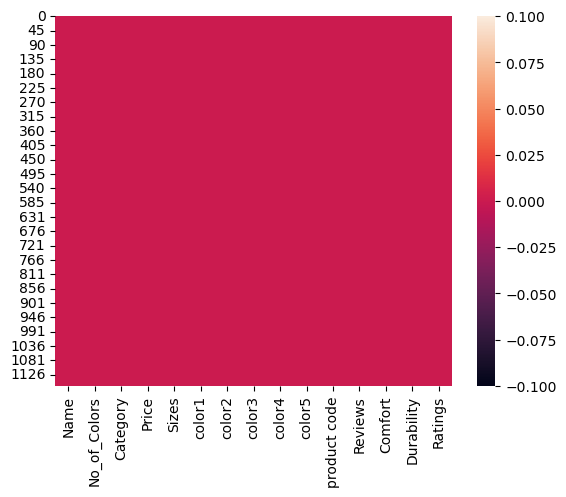

In [21]:
#Graphical representation of the cleaned dataset after removing the rows with null values
sns.heatmap(df_.isnull())

# Problem Statement: make predictions of price

In [24]:
#Let's check for the number of unique values present in each column of the dataset
for i in df_.columns:
    u=df_[i].unique()
    print("Unique values in", i,'are :',u )
    print("*"*30)

Unique values in Name are : ["Nike Air Force 1 '07" "Nike Air Force 1 '07 EasyOn" 'Nike Gamma Force'
 'Air Jordan 1 Low SE' 'Nike Air Max 1' 'Nike Court Vision Low'
 'Nike Dunk Low Retro Premium' 'Nike Air Max 90' 'Nike Tech Hera'
 'Nike Calm' "Nike Air Force 1 '07 Pro Tech" 'Nike Dunk Low SE'
 'Jordan Stadium 90' 'Air Jordan 1 Low' 'Nike Air Zoom Victory Tour 3'
 "Luka 2 'Bred' PF" 'Jordan One Take 4 PF' 'Jumpman MVP'
 'Nike Metcon 9 PRM' "Tatum 1 'Home Team' PF"
 'Nike Juniper Trail 2 GORE-TEX' 'Nike SB React Leo' 'Nike Winflo 10'
 'Nike Air Max Alpha Trainer 5' 'Nike Fly.By Mid 3'
 'Nike Air Max SC Leather' 'Nike Full Force Low' 'Nike Revolution 7'
 'Nike Air Force 1 Sculpt Unlocked By You' 'Nike Downshifter 12'
 'Paris Saint-Germain Jumpman MVP' 'Jordan Super Play'
 'Nike Court Vision Low Next Nature' 'Air Jordan 1 Elevate High'
 'Jordan Stay Loyal 3' 'Jordan Play' 'Nike G.T. Jump 2 EP'
 'Air Jordan Legacy 312 Low' 'Nike Air Max Cirro' 'Nike Infinity Pro 2'
 'Nike Mercurial Superfl

Let's remove the 'Name' and 'Product code' columns from the dataset

In [25]:
#Dropping off the 'Name' column from the dataset
df_.drop("Name", axis= 1, inplace =True)

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\3408891886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.drop("Name", axis= 1, inplace =True)


In [26]:
#Dropping off the 'product code' column from the dataset
df_.drop("product code", axis= 1, inplace =True)

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\4141536354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.drop("product code", axis= 1, inplace =True)


In [28]:
#Let's fill the "-" with the mode values of the comfort column
mode_values = df_['Comfort'].mode().iloc[0]
df_['Comfort'].replace('-',mode_values, inplace=True)

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\4206079713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Comfort'].replace('-',mode_values, inplace=True)


In [82]:
mode_values = df['color1'].mode().iloc[0]

In [84]:
df['color1'].replace('-',mode_values, inplace=True)

In [85]:
mode_values = df['color2'].mode().iloc[0]
df['color2'].replace('-',mode_values, inplace=True)

In [86]:
mode_values = df['color3'].mode().iloc[0]
df['color3'].replace('-',mode_values, inplace=True)

In [87]:
mode_values = df['color4'].mode().iloc[0]
df['color4'].replace('-',mode_values, inplace=True)

In [88]:
mode_values = df['color5'].mode().iloc[0]
df['color5'].replace('-',mode_values, inplace=True)

In [29]:
#Let's find the the info of the columns in the dataset
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   No_of_Colors  1160 non-null   int64 
 1   Category      1160 non-null   object
 2   Price         1160 non-null   object
 3   Sizes         1160 non-null   object
 4   color1        1160 non-null   object
 5   color2        1160 non-null   object
 6   color3        1160 non-null   object
 7   color4        1160 non-null   object
 8   color5        1160 non-null   object
 9   Reviews       1160 non-null   object
 10  Comfort       1160 non-null   object
 11  Durability    1160 non-null   object
 12  Ratings       1160 non-null   object
dtypes: int64(1), object(12)
memory usage: 126.9+ KB


In [30]:
df_['Price'].value_counts()

     13 995.00               44
     14 995.00               38
     10 795.00               30
     8 695.00                27
     11 895.00               27
                             ..
  3 887.00\n     4 095.00     1
  5 787.00\n     6 095.00     1
7 877.00                      1
10 495.00                     1
95.99                         1
Name: Price, Length: 295, dtype: int64

In [31]:
#pd.to_numeric(df['Price'])

Couldn't convert the price column to numeric() so unsing Label encoder to convert the object data type to int

In [32]:
le=LabelEncoder()
for i in df_.columns:
    if df_[i].dtypes =='object':
        df_[i]= le.fit_transform(df_[i])
        print("The data type of", i, "is changed to:", df_[i].dtypes)
    else:
        print("The data type of ", i, "is numeric")

The data type of  No_of_Colors is numeric
The data type of Category is changed to: int32
The data type of Price is changed to: int32
The data type of Sizes is changed to: int32
The data type of color1 is changed to: int32
The data type of color2 is changed to: int32
The data type of color3 is changed to: int32
The data type of color4 is changed to: int32
The data type of color5 is changed to: int32
The data type of Reviews is changed to: int32
The data type of Comfort is changed to: int32
The data type of Durability is changed to: int32
The data type of Ratings is changed to: int32


C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\1800181476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[i]= le.fit_transform(df_[i])


In [33]:
#Let's look into the statistical information of the dataset
df_.describe()

No_of_Colors     Category        Price        Sizes       color1  \
count   1160.000000  1160.000000  1160.000000  1160.000000  1160.000000   
mean       2.134483    48.043103   115.743103     8.950000   201.892241   
std        1.685092    19.996114    86.190828     7.093794   127.887574   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000    40.000000    39.750000     5.000000   107.000000   
50%        1.000000    41.000000    86.000000     6.000000   170.500000   
75%        3.000000    71.000000   190.250000    11.000000   306.000000   
max       14.000000    91.000000   294.000000    26.000000   460.000000   

            color2       color3       color4       color5      Reviews  \
count  1160.000000  1160.000000  1160.000000  1160.000000  1160.000000   
mean    134.139655    92.662931    63.326724    48.364655    79.281897   
std     111.768347    90.435392    69.941768    57.992017    66.821674   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      30.000000     0.000000     0.000000     0.000000     3.000000   
50%     111.000000    71.500000    47.000000    29.000000    73.000000   
75%     228.250000   164.250000   107.250000    81.250000   134.000000   
max     376.000000   299.000000   236.000000   194.000000   208.000000   

           Comfort   Durability      Ratings  
count  1160.000000  1160.000000  1160.000000  
mean     17.837069     2.432759    16.258621  
std       8.763118     2.776202     8.425505  
min       0.000000     0.000000     0.000000  
25%      12.000000     0.000000    14.000000  
50%      21.000000     0.000000    20.000000  
75%      26.000000     6.000000    22.000000  
max      27.000000     7.000000    25.000000

# Data visualization

Univariant Analysis

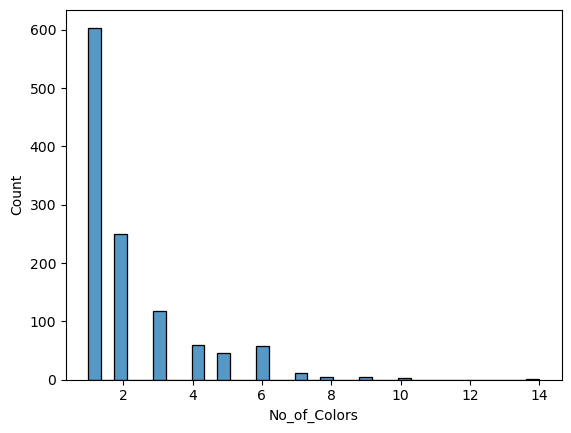

1     604
2     250
3     118
4      59
6      58
5      46
7      12
8       5
9       4
10      3
14      1
Name: No_of_Colors, dtype: int64

In [34]:
#Let's visualize the 'No_of_Colors' attribute
sns.histplot(x='No_of_Colors', data=df_)
plt.show()
df_['No_of_Colors'].value_counts()

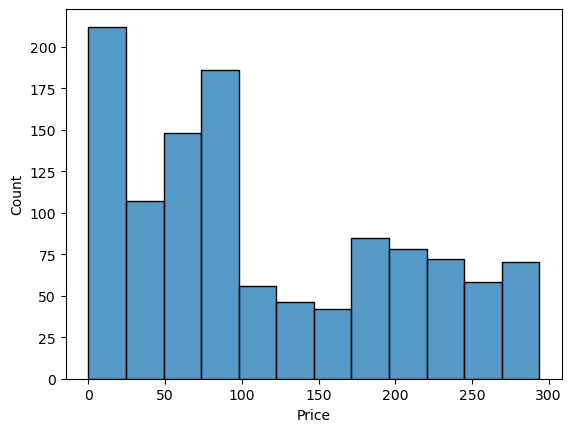

21     44
24     38
6      30
86     27
13     27
       ..
115     1
122     1
272     1
161     1
293     1
Name: Price, Length: 295, dtype: int64

In [35]:
#Let's visualize the 'Price' attribute
sns.histplot(x='Price', data=df_)
plt.show()
df_['Price'].value_counts()

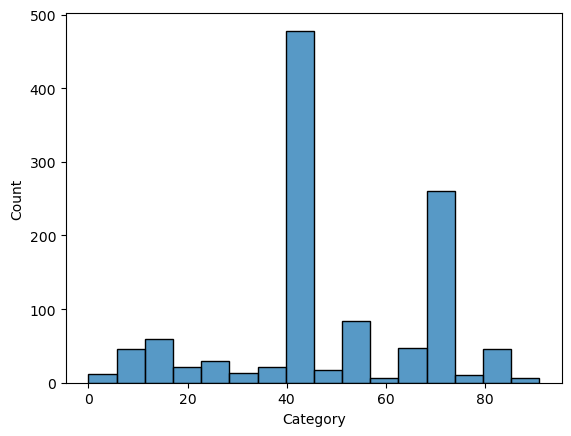

40    295
41    178
72    151
71     88
56     70
     ... 
3       1
4       1
35      1
19      1
8       1
Name: Category, Length: 92, dtype: int64

In [36]:
#Let's visualize the 'No_of_Colors' attribute
sns.histplot(x='Category', data=df_)
plt.show()
df_['Category'].value_counts()

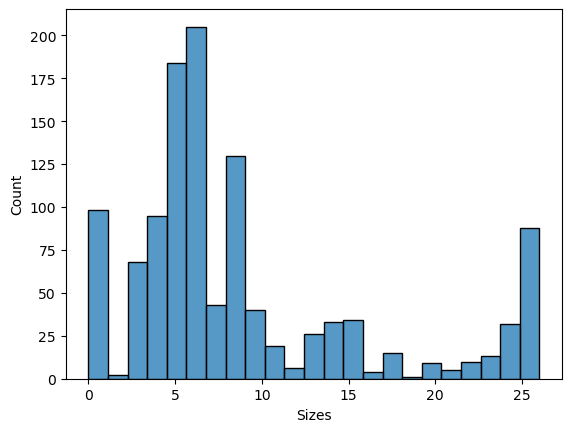

6     205
5     184
4      95
8      92
1      92
26     68
3      68
7      43
10     40
9      38
15     34
14     33
24     32
13     26
25     20
11     19
23     13
17     11
22     10
20      9
12      6
0       6
21      5
18      4
16      4
2       2
19      1
Name: Sizes, dtype: int64

In [37]:
#Let's visualize the 'Sizes' attribute
sns.histplot(x='Sizes', data=df_)
plt.show()
df_['Sizes'].value_counts()

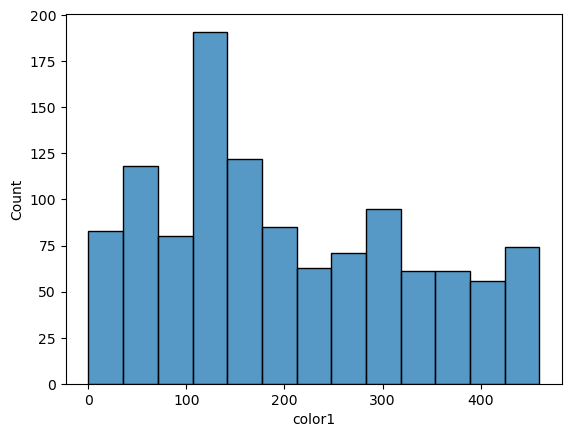

37     30
57     27
142    22
137    20
119    16
       ..
47      1
15      1
92      1
235     1
131     1
Name: color1, Length: 461, dtype: int64

In [38]:
#Let's visualize the 'color1' attribute
sns.histplot(x='color1', data=df_)
plt.show()
df_['color1'].value_counts()

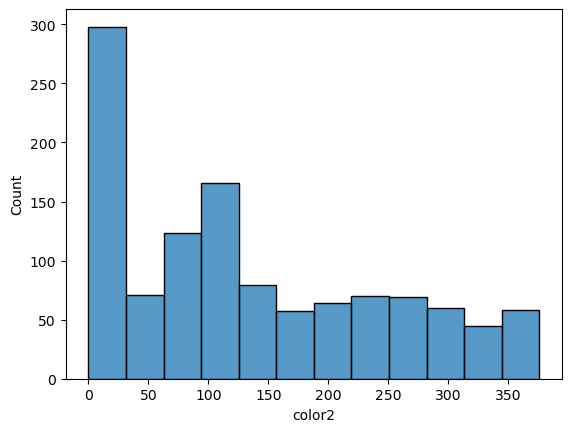

0      204
30      25
116     22
111     20
46      17
      ... 
338      1
144      1
320      1
347      1
332      1
Name: color2, Length: 377, dtype: int64

In [39]:
#Let's visualize the 'color2' attribute
sns.histplot(x='color2', data=df_)
plt.show()
df_['color2'].value_counts()

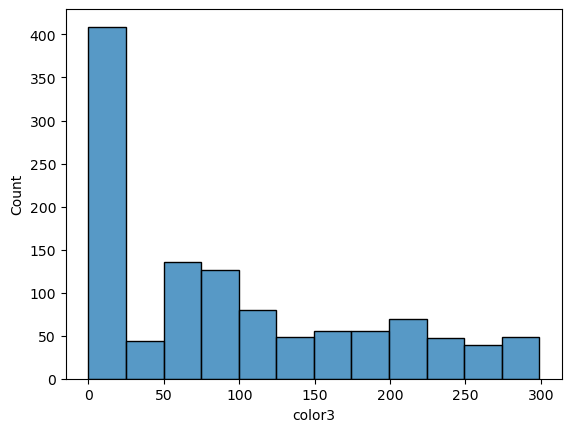

0      344
90      22
85      20
21      18
69      16
      ... 
141      1
110      1
128      1
260      1
167      1
Name: color3, Length: 300, dtype: int64

In [40]:
#Let's visualize the 'color3' attribute
sns.histplot(x='color3', data=df_)
plt.show()
df_['color3'].value_counts()

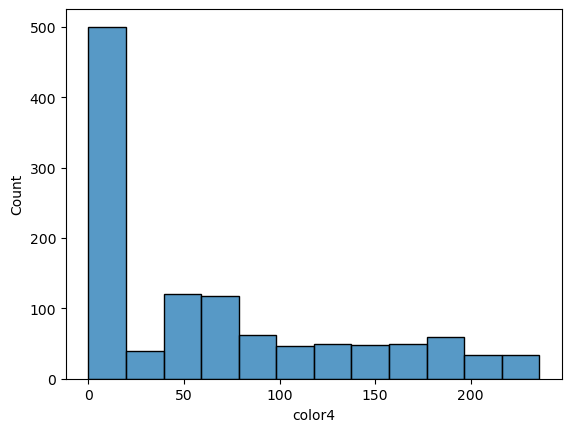

0      442
75      22
70      20
15      17
55      16
      ... 
221      1
220      1
124      1
113      1
86       1
Name: color4, Length: 237, dtype: int64

In [41]:
#Let's visualize the 'color4' attribute
sns.histplot(x='color4', data=df_)
plt.show()
df_['color4'].value_counts()

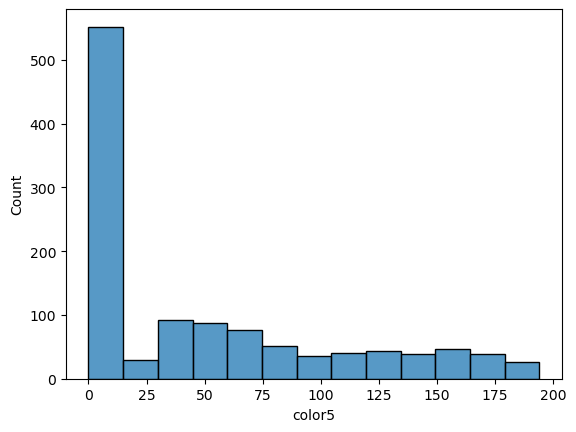

0      511
64      22
59      20
45      16
62      13
      ... 
186      1
185      1
95       1
164      1
23       1
Name: color5, Length: 195, dtype: int64

In [42]:
#Let's visualize the 'color5' attribute
sns.histplot(x='color5', data=df_)
plt.show()
df_['color5'].value_counts()

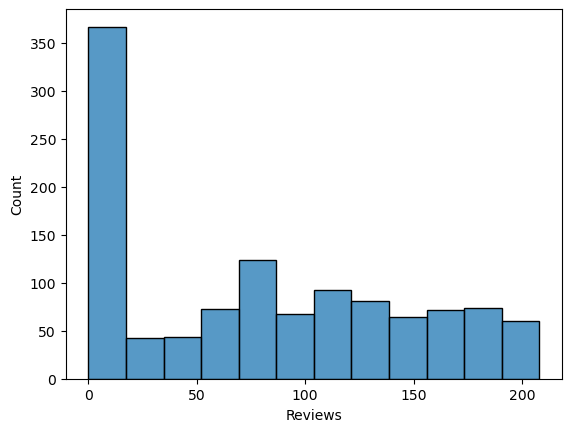

1      110
0       97
73      83
2       81
155     33
      ... 
66       1
14       1
116      1
16       1
103      1
Name: Reviews, Length: 209, dtype: int64

In [43]:
#Let's visualize the 'Reviews' attribute
sns.histplot(x='Reviews', data=df_)
plt.show()
df_['Reviews'].value_counts()

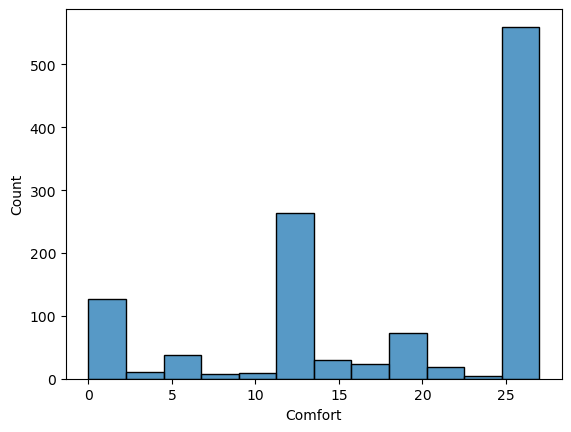

26    329
12    249
25    210
1      98
5      35
18     32
14     29
2      26
19     21
27     21
20     19
13     14
16     14
22     10
3       9
17      9
21      8
11      5
8       4
7       3
0       3
24      3
10      2
6       2
9       2
23      1
15      1
4       1
Name: Comfort, dtype: int64

In [44]:
#Let's visualize the 'comfort' attribute
sns.histplot(x='Comfort', data=df_)
plt.show()
df_['Comfort'].value_counts()

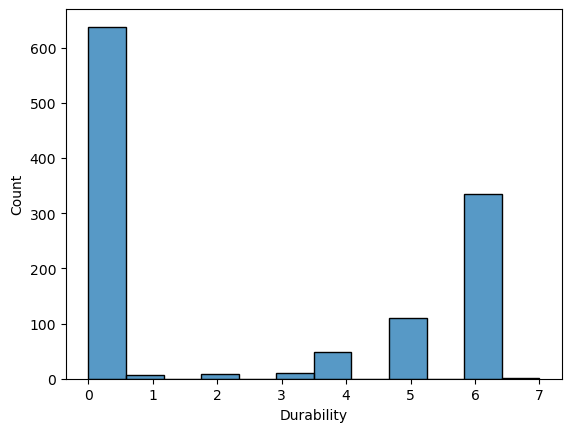

0    638
6    334
5    110
4     49
3     11
2      9
1      7
7      2
Name: Durability, dtype: int64

In [45]:
#Let's visualize the 'Durability' attribute
sns.histplot(x='Durability', data=df_)
plt.show()
df_['Durability'].value_counts()

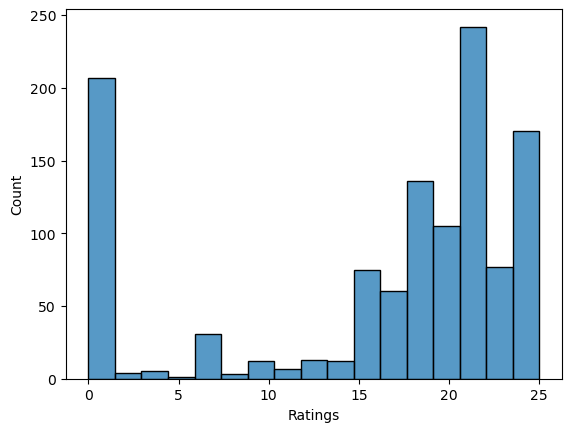

25    135
21    129
22    113
1     110
20    105
0      97
19     80
23     77
17     60
18     56
15     49
24     35
6      29
16     26
14     12
13     12
10      7
11      7
9       5
2       4
8       3
3       3
7       2
4       2
5       1
12      1
Name: Ratings, dtype: int64

In [46]:
#Let's visualize the 'Ratings' attribute
sns.histplot(x='Ratings', data=df_)
plt.show()
df_['Ratings'].value_counts()

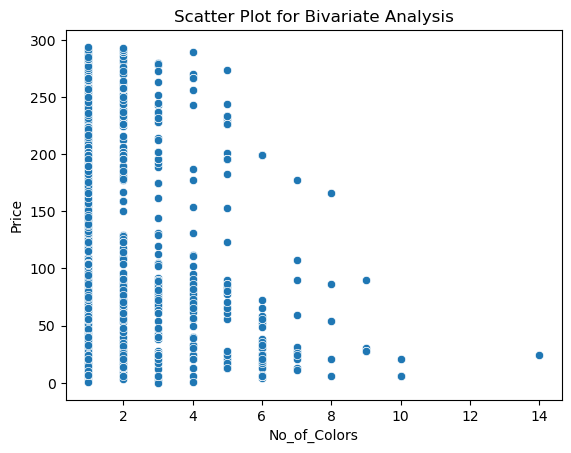

In [47]:
sns.scatterplot(x='No_of_Colors', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

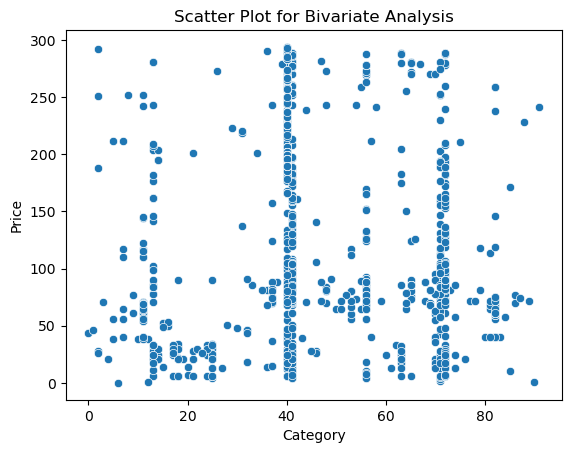

In [48]:
sns.scatterplot(x='Category', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

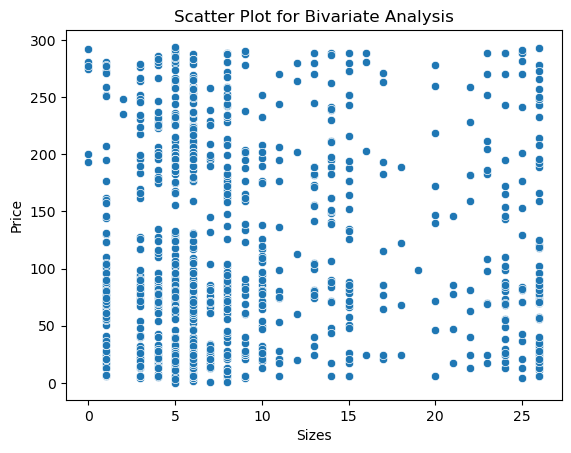

In [49]:
sns.scatterplot(x='Sizes', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

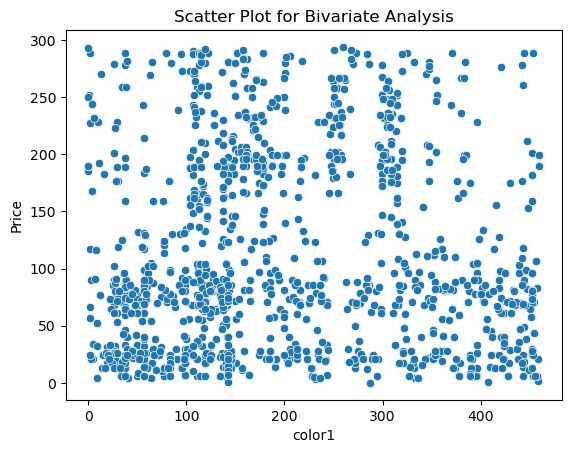

In [50]:
sns.scatterplot(x='color1', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

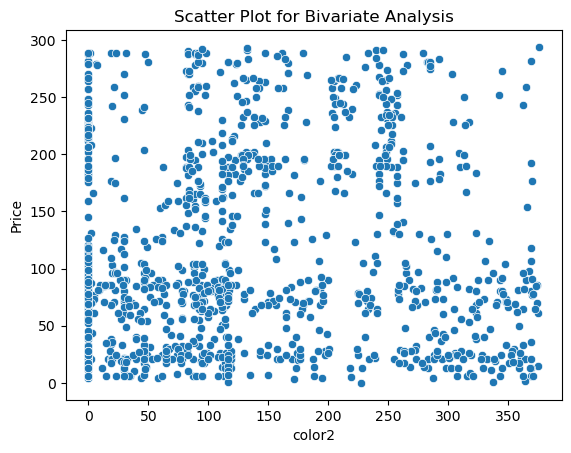

In [51]:
sns.scatterplot(x='color2', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

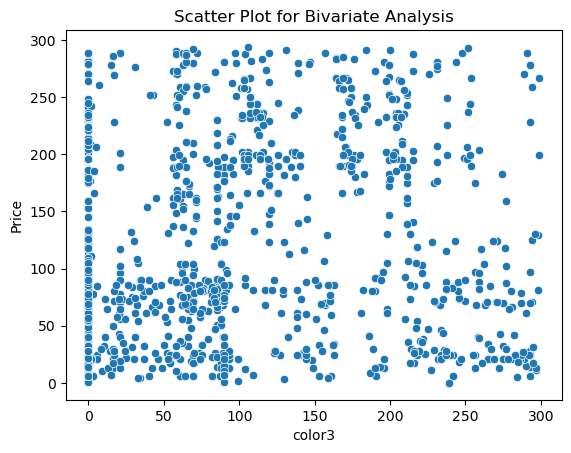

In [52]:
sns.scatterplot(x='color3', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

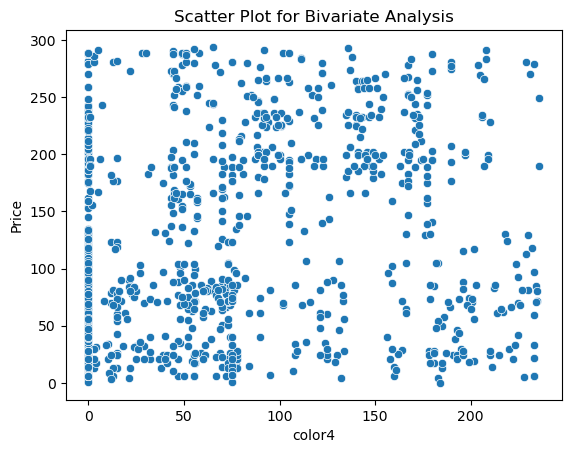

In [53]:
sns.scatterplot(x='color4', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

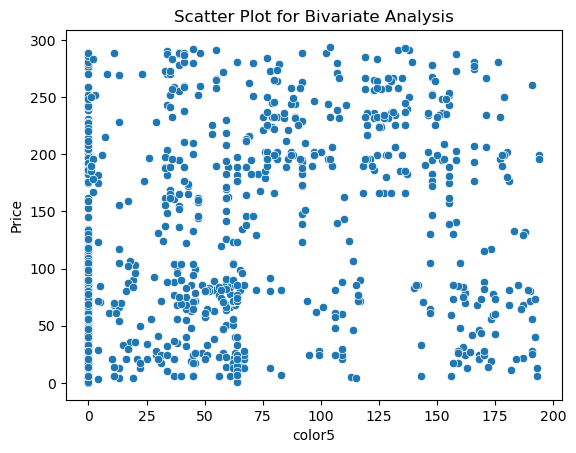

In [54]:
sns.scatterplot(x='color5', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

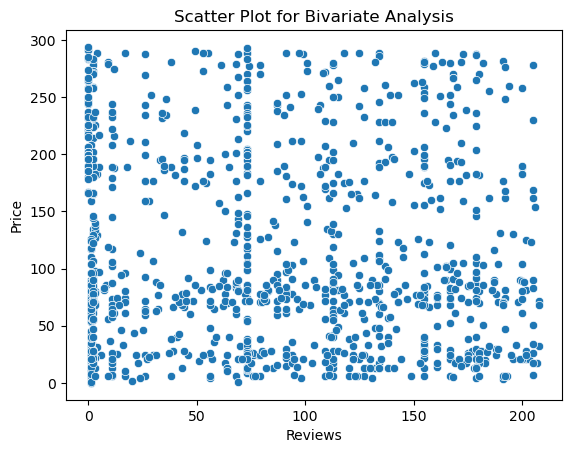

In [55]:
sns.scatterplot(x='Reviews', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

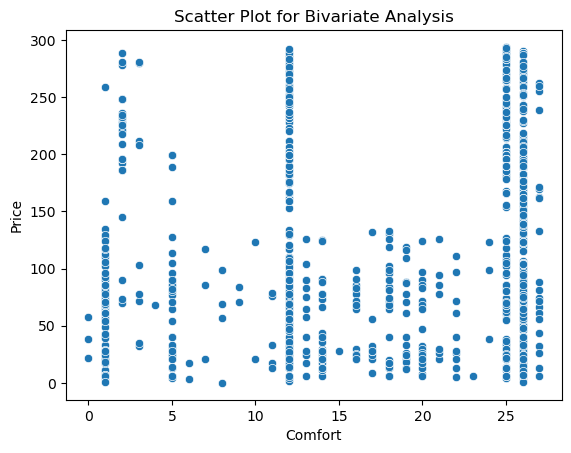

In [56]:
sns.scatterplot(x='Comfort', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

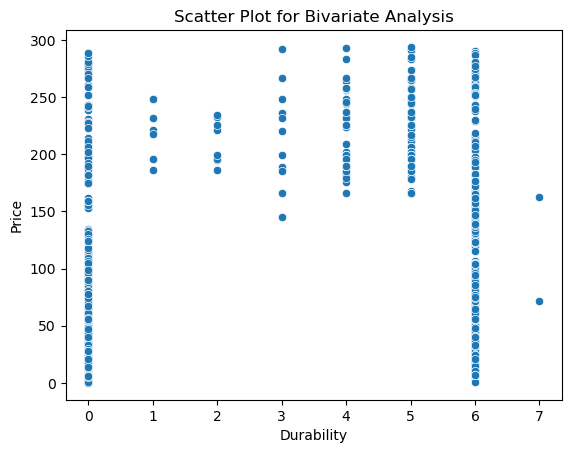

In [57]:
sns.scatterplot(x='Durability', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

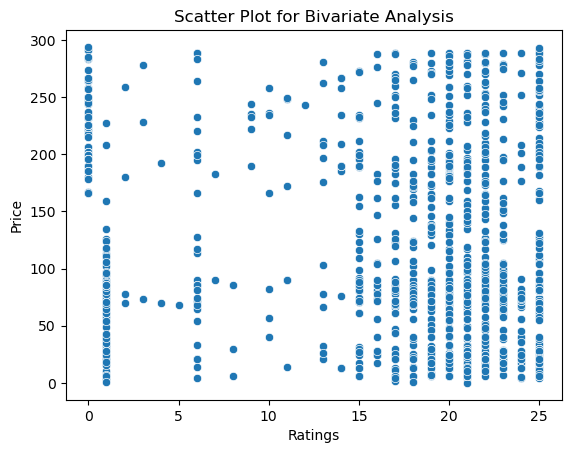

In [58]:
sns.scatterplot(x='Ratings', y='Price', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

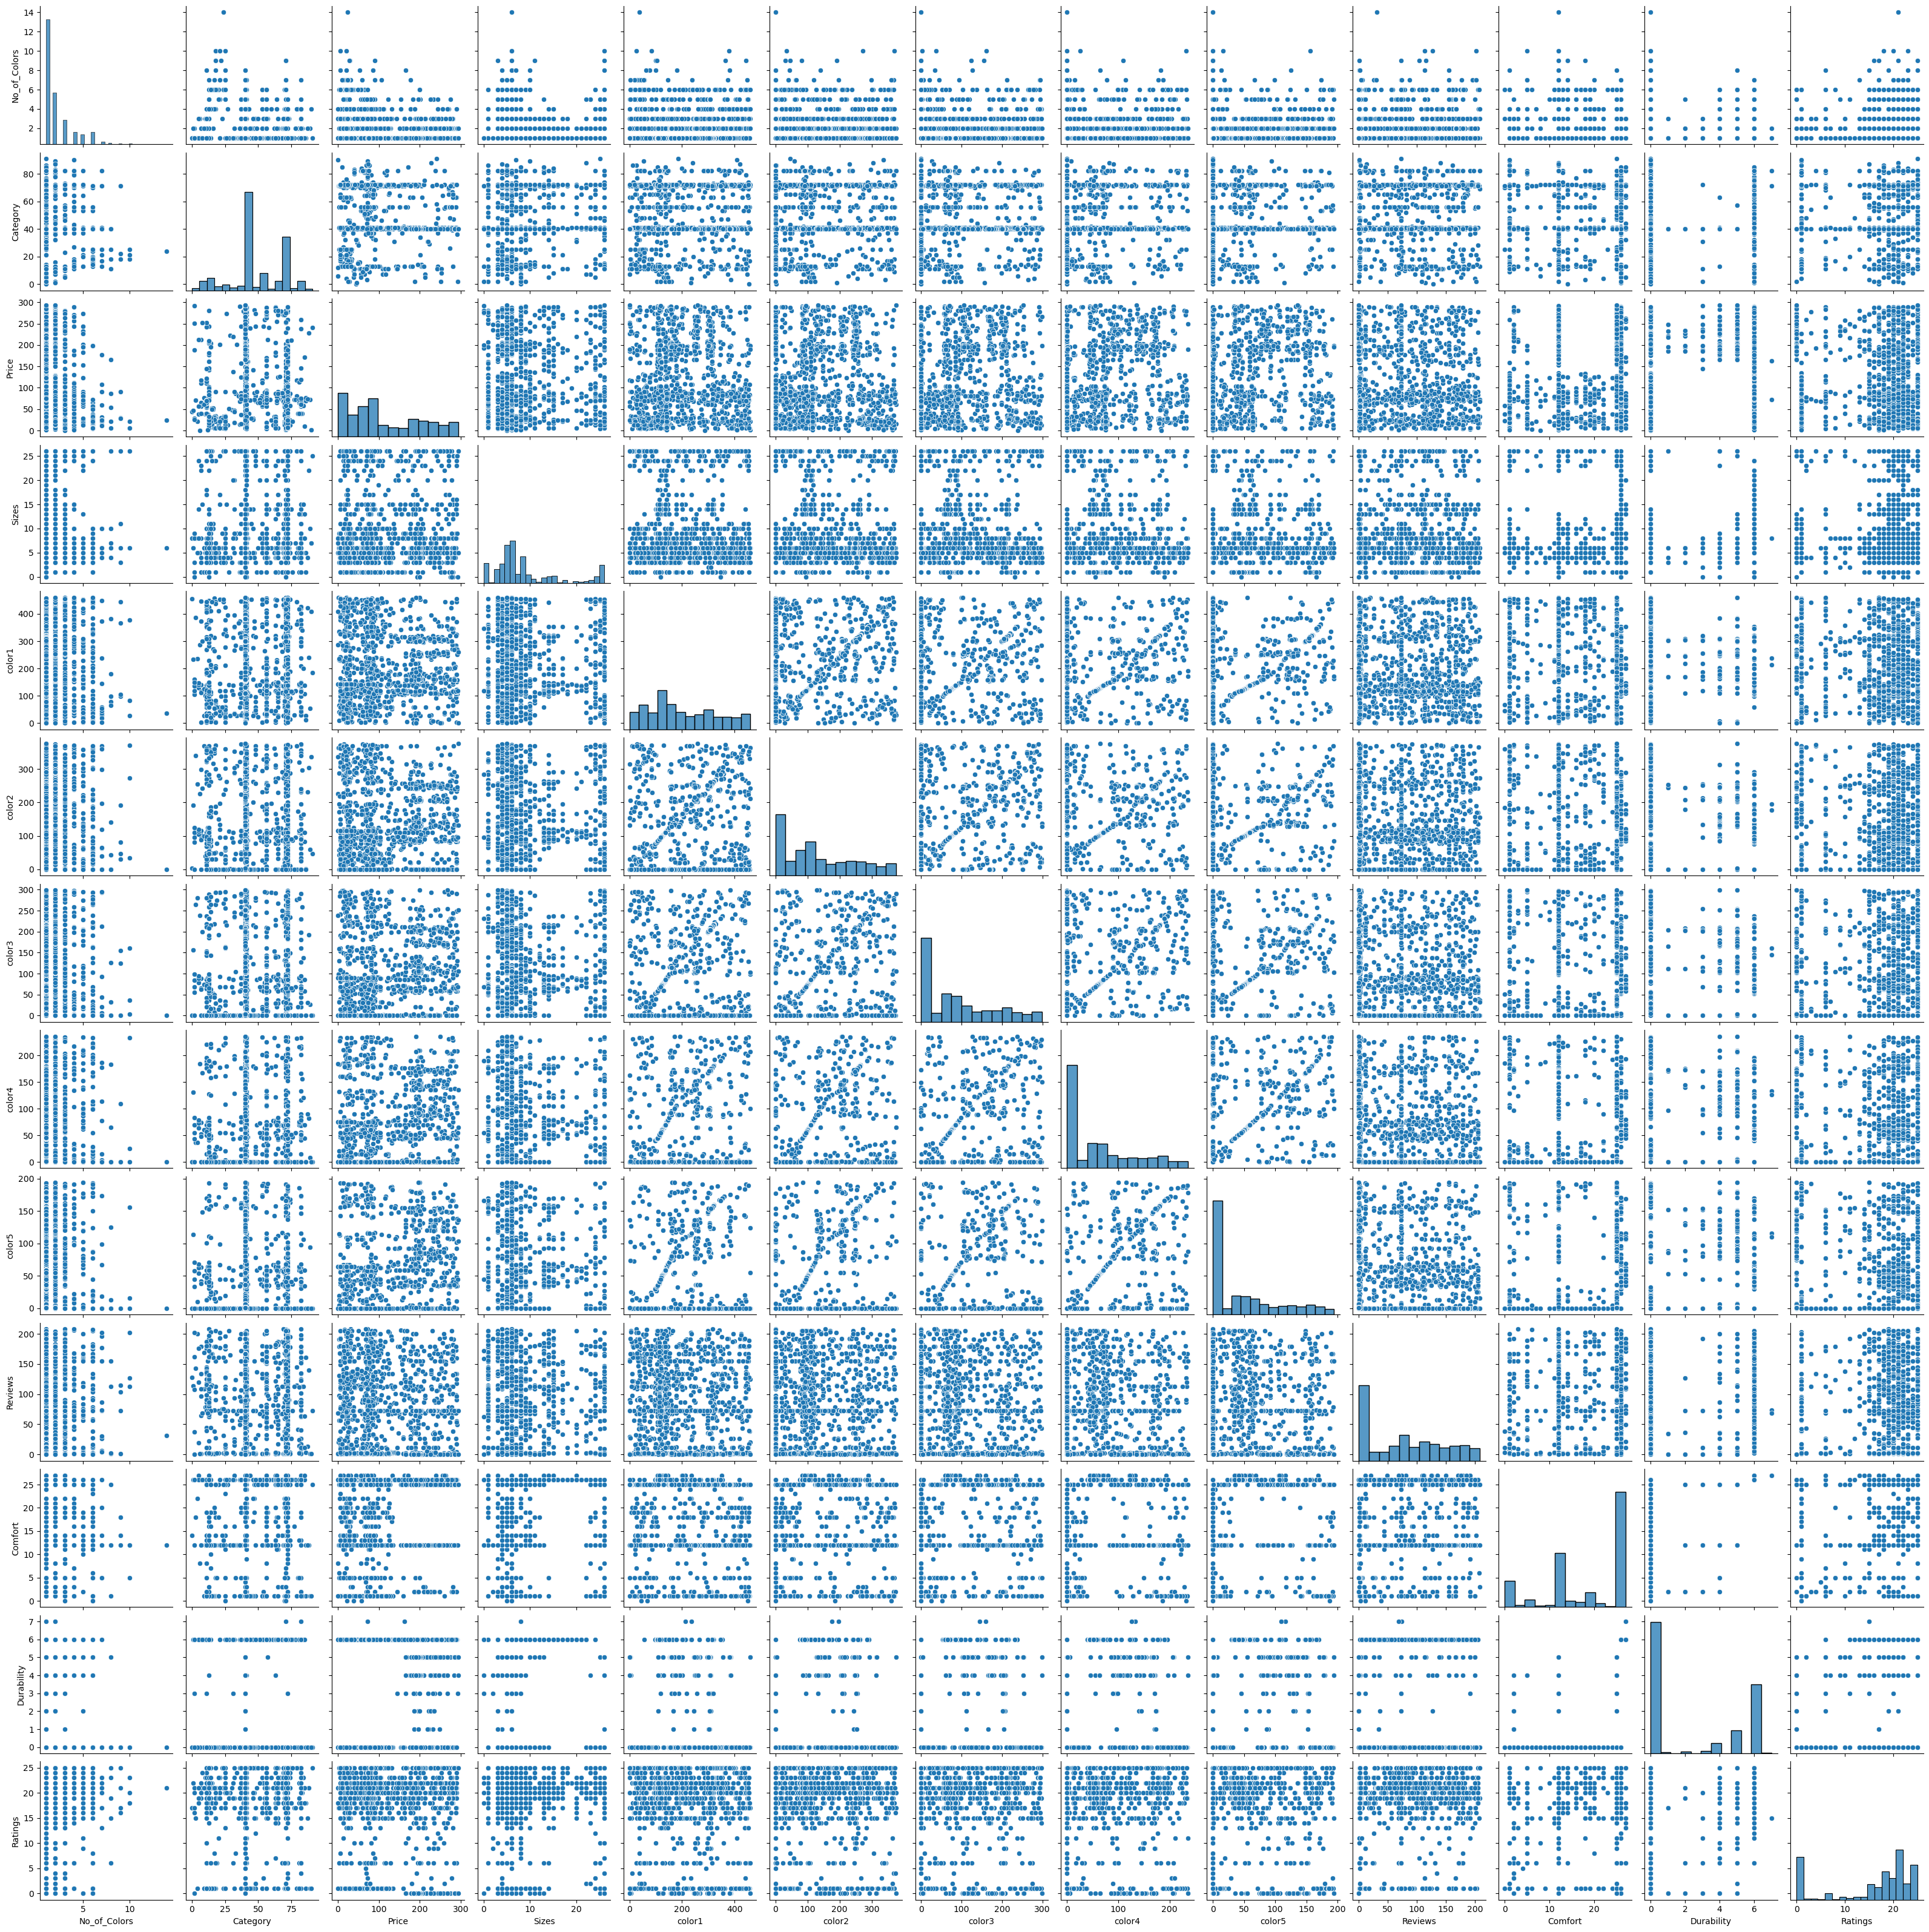

In [60]:
sns.pairplot(df_)
plt.show()

# Outliers

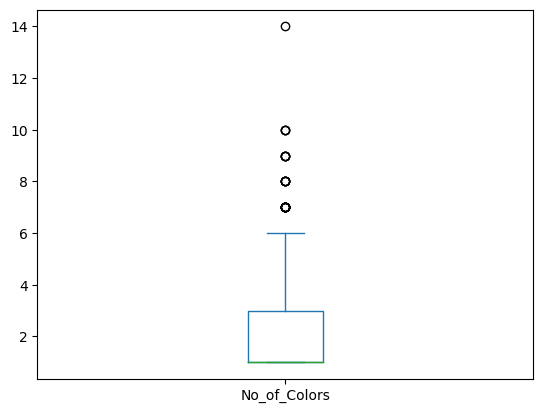

In [61]:
# Let's check if there are any outliers in 'No_of_Colors'
df_['No_of_Colors'].plot.box()
plt.show()

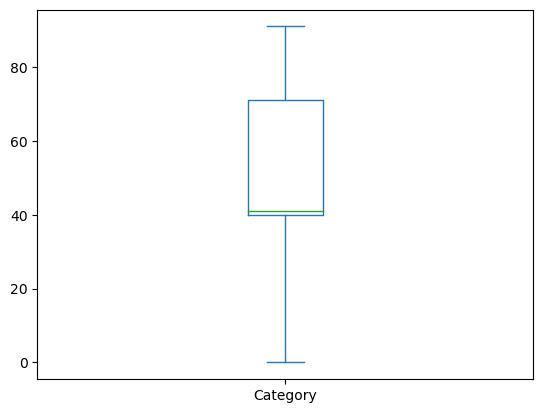

In [62]:
# Let's check if there are any outliers in 'Category'
df_['Category'].plot.box()
plt.show()

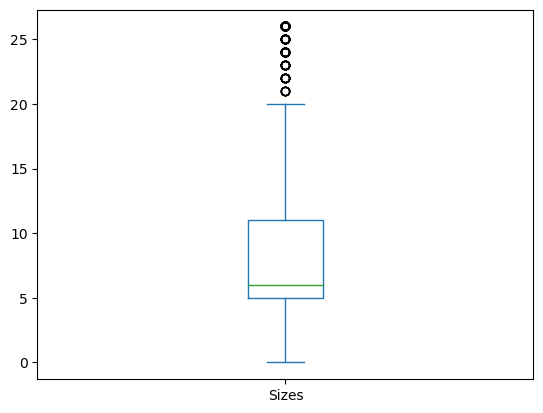

In [63]:
# Let's check if there are any outliers in 'Sizes'
df_['Sizes'].plot.box()
plt.show()

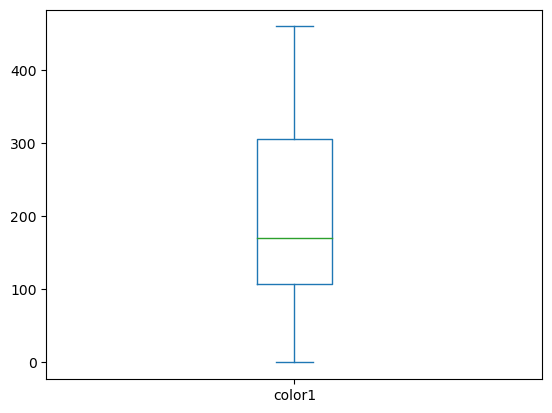

In [64]:
# Let's check if there are any outliers in 'color1'
df_['color1'].plot.box()
plt.show()

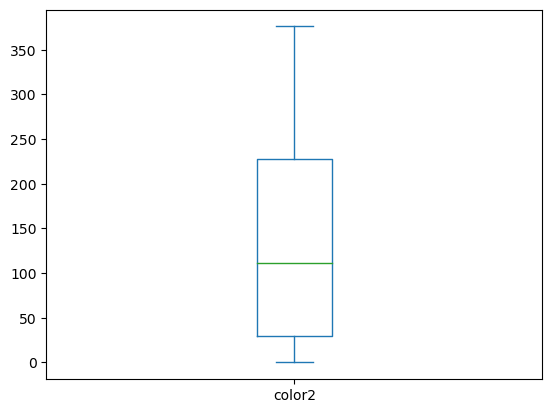

In [65]:
# Let's check if there are any outliers in 'color2'
df_['color2'].plot.box()
plt.show()

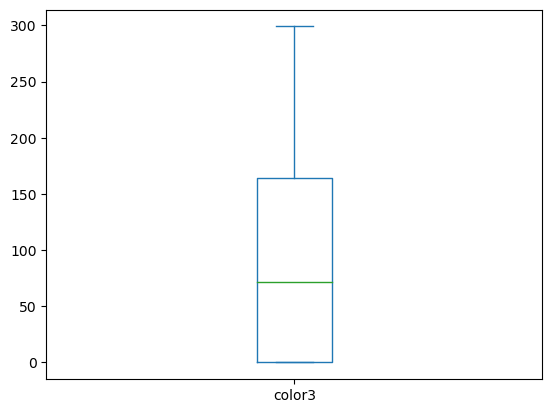

In [66]:
# Let's check if there are any outliers in 'color3'
df_['color3'].plot.box()
plt.show()

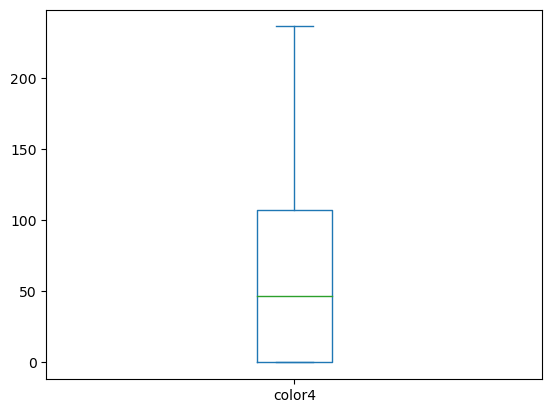

In [67]:
# Let's check if there are any outliers in 'color4'
df_['color4'].plot.box()
plt.show()

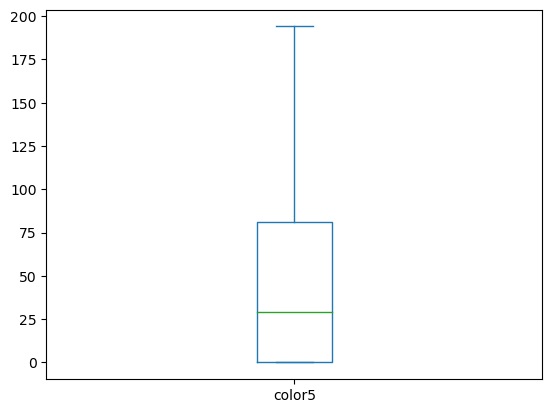

In [68]:
# Let's check if there are any outliers in 'color5'
df_['color5'].plot.box()
plt.show()

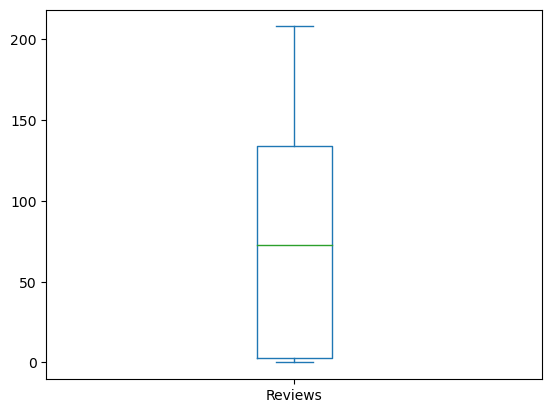

In [69]:
# Let's check if there are any outliers in 'Reviews'
df_['Reviews'].plot.box()
plt.show()

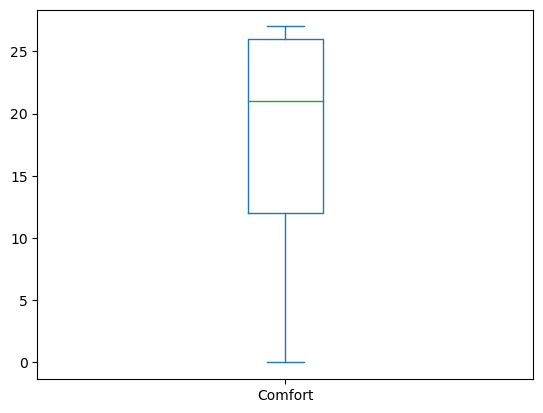

In [70]:
# Let's check if there are any outliers in 'Comfort'
df_['Comfort'].plot.box()
plt.show()

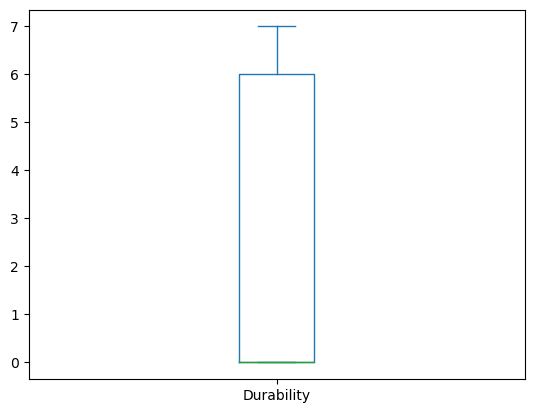

In [71]:
# Let's check if there are any outliers in 'Durability'
df_['Durability'].plot.box()
plt.show()

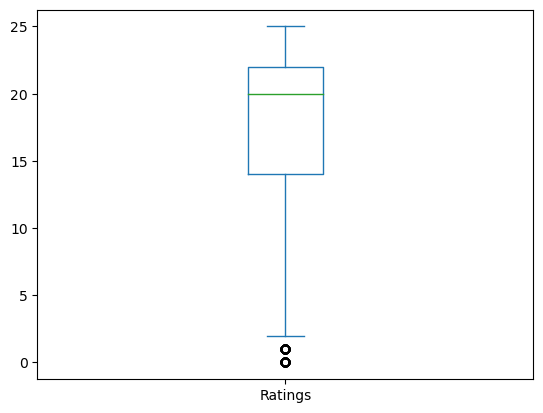

In [72]:
# Let's check if there are any outliers in 'Ratings'
df_['Ratings'].plot.box()
plt.show()

It is observed that there are outliers present in the dataset, let's check the zscore of the dataset and remove the outliers

In [73]:
df_.columns

Index(['No_of_Colors', 'Category', 'Price', 'Sizes', 'color1', 'color2',
       'color3', 'color4', 'color5', 'Reviews', 'Comfort', 'Durability',
       'Ratings'],
      dtype='object')

Moving the x variables/columns to the df_z to check the zscore

In [74]:
df_z = df_.drop(df_.columns[2], axis=1)

In [75]:
df_z.columns

Index(['No_of_Colors', 'Category', 'Sizes', 'color1', 'color2', 'color3',
       'color4', 'color5', 'Reviews', 'Comfort', 'Durability', 'Ratings'],
      dtype='object')

In [76]:
z= np.abs(zscore(df_z))

In [77]:
#Let's see the cells for which the zscore is more than the threshold value
threshold = 3
print(np.where(z>3))

(array([ 132,  150,  152,  159,  178,  185,  200,  237,  300,  407,  575,
        576, 1148], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [78]:
#Let's verify the above data
df_z.iloc[132][0]

10

In [79]:
df_z.iloc[1148][0]

8

In [80]:
#Let's create a new data set by removing the outliers
df_new= df_[(z<3). all(axis=1) ]

In [81]:
df_new

No_of_Colors  Category  Price  Sizes  color1  color2  color3  color4  \
0                2        41    270     23      13      30     226     231   
1                1        72    289     25      37     279     291      28   
2                4        72    154     24     341     366      39       0   
3                5        72    153     25     448      60       0       0   
4                2        72    159     22      76       0       0       0   
...            ...       ...    ...    ...     ...     ...     ...     ...   
1156             2        40    185      5       0     153     174     136   
1157             1        40    190      5       0     153     174     163   
1158             1        40    190      5       0     315     167     139   
1159             1        40    250     26       0     246      60      86   
1160             1        40    190      3     131     158      60     118   

      color5  Reviews  Comfort  Durability  Ratings  
0         23      180       26           0       22  
1          0       55       26           0       23  
2          0      206       25           0       19  
3          0      119       12           0       22  
4          0       28        5           0       21  
...      ...      ...      ...         ...      ...  
1156       1        0       25           5        0  
1157       1       73       25           4       20  
1158       1      155       25           5       15  
1159       1        0       25           5        0  
1160       1      200       25           4       14  

[1147 rows x 13 columns]

Now let's check for the skewness

In [82]:
df_new.skew()

No_of_Colors    1.542539
Category       -0.130973
Price           0.516547
Sizes           1.305447
color1          0.398343
color2          0.501874
color3          0.655554
color4          0.827395
color5          0.938124
Reviews         0.266757
Comfort        -0.641676
Durability      0.314861
Ratings        -1.001817
dtype: float64

In [92]:
df_new['No_of_Colors'] = np.log1p(df_new['No_of_Colors'])
df_new['No_of_Colors'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\582867356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['No_of_Colors'] = np.log1p(df_new['No_of_Colors'])


0.4906122362405596

In [93]:
df_new['Sizes'] = np.log1p(df_new['Sizes'])
df_new['Sizes'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\1290936051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sizes'] = np.log1p(df_new['Sizes'])


-0.09334870449348022

In [94]:
corr = df_new.corr()
corr

No_of_Colors  Category     Price     Sizes    color1    color2  \
No_of_Colors      1.000000 -0.113294 -0.160315 -0.003649  0.047199 -0.038502   
Category         -0.113294  1.000000 -0.063606  0.038717 -0.017576 -0.005817   
Price            -0.160315 -0.063606  1.000000  0.050300  0.020558  0.055363   
Sizes            -0.003649  0.038717  0.050300  1.000000 -0.019757  0.019147   
color1            0.047199 -0.017576  0.020558 -0.019757  1.000000  0.151503   
color2           -0.038502 -0.005817  0.055363  0.019147  0.151503  1.000000   
color3           -0.058526 -0.074700  0.172540 -0.008732  0.056409  0.401288   
color4           -0.050396 -0.055745  0.282792 -0.061476  0.131281  0.295147   
color5           -0.092325 -0.061031  0.338028 -0.069610  0.114932  0.279008   
Reviews          -0.062778  0.050224 -0.086828 -0.032447 -0.050696 -0.030923   
Comfort          -0.198116 -0.002229  0.219970 -0.018927 -0.095266  0.022324   
Durability       -0.293369 -0.029886  0.361615 -0.044881 -0.120402  0.056460   
Ratings          -0.062616  0.087705 -0.136869  0.014057 -0.106821 -0.047246   

                color3    color4    color5   Reviews   Comfort  Durability  \
No_of_Colors -0.058526 -0.050396 -0.092325 -0.062778 -0.198116   -0.293369   
Category     -0.074700 -0.055745 -0.061031  0.050224 -0.002229   -0.029886   
Price         0.172540  0.282792  0.338028 -0.086828  0.219970    0.361615   
Sizes        -0.008732 -0.061476 -0.069610 -0.032447 -0.018927   -0.044881   
color1        0.056409  0.131281  0.114932 -0.050696 -0.095266   -0.120402   
color2        0.401288  0.295147  0.279008 -0.030923  0.022324    0.056460   
color3        1.000000  0.528732  0.418608 -0.044800  0.147190    0.224173   
color4        0.528732  1.000000  0.621912 -0.039610  0.226934    0.409001   
color5        0.418608  0.621912  1.000000 -0.054445  0.285946    0.515968   
Reviews      -0.044800 -0.039610 -0.054445  1.000000  0.136677    0.097255   
Comfort       0.147190  0.226934  0.285946  0.136677  1.000000    0.679230   
Durability    0.224173  0.409001  0.515968  0.097255  0.679230    1.000000   
Ratings      -0.049262 -0.081013 -0.143002  0.320206  0.359994    0.079263   

               Ratings  
No_of_Colors -0.062616  
Category      0.087705  
Price        -0.136869  
Sizes         0.014057  
color1       -0.106821  
color2       -0.047246  
color3       -0.049262  
color4       -0.081013  
color5       -0.143002  
Reviews       0.320206  
Comfort       0.359994  
Durability    0.079263  
Ratings       1.000000

<AxesSubplot:>

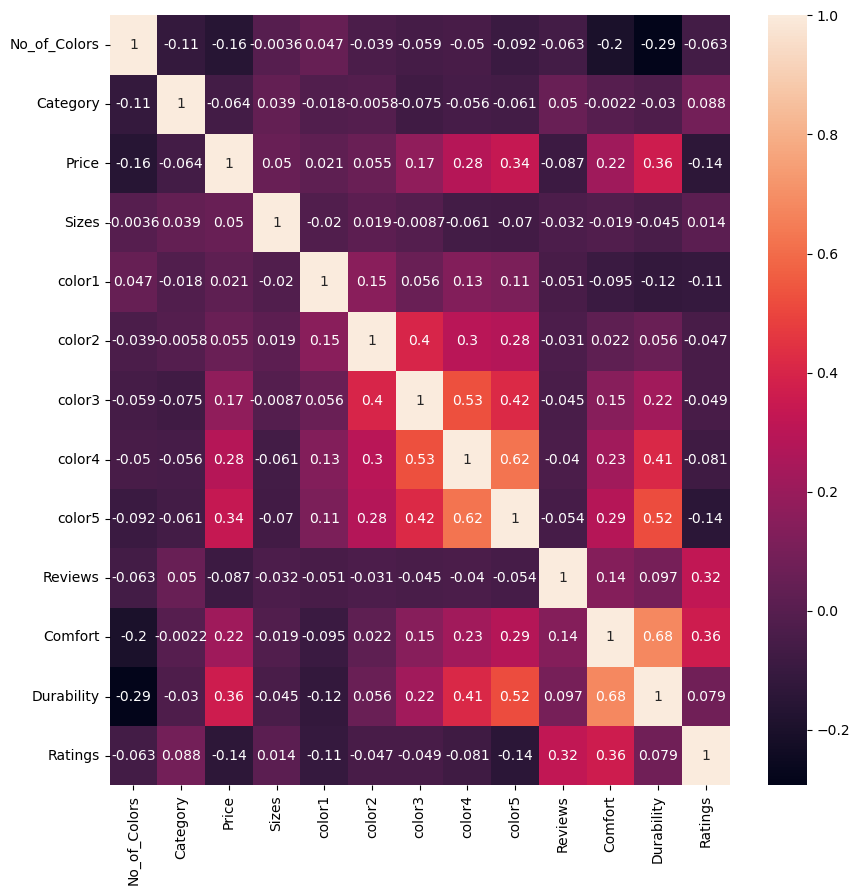

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [96]:
X= df_new.drop(df_new.columns[2], axis=1)

In [97]:
X

No_of_Colors  Category     Sizes  color1  color2  color3  color4  \
0         0.194803        41  3.178054      13      30     226     231   
1         0.174828        72  3.258097      37     279     291      28   
2         0.208429        72  3.218876     341     366      39       0   
3         0.211805        72  3.258097     448      60       0       0   
4         0.194803        72  3.135494      76       0       0       0   
...            ...       ...       ...     ...     ...     ...     ...   
1156      0.194803        40  1.791759       0     153     174     136   
1157      0.174828        40  1.791759       0     153     174     163   
1158      0.174828        40  1.791759       0     315     167     139   
1159      0.174828        40  3.295837       0     246      60      86   
1160      0.174828        40  1.386294     131     158      60     118   

      color5  Reviews  Comfort  Durability  Ratings  
0         23      180       26           0       22  
1          0       55       26           0       23  
2          0      206       25           0       19  
3          0      119       12           0       22  
4          0       28        5           0       21  
...      ...      ...      ...         ...      ...  
1156       1        0       25           5        0  
1157       1       73       25           4       20  
1158       1      155       25           5       15  
1159       1        0       25           5        0  
1160       1      200       25           4       14  

[1147 rows x 12 columns]

In [98]:
y= df_new.loc[:, 'Price']

In [99]:
y

0       270
1       289
2       154
3       153
4       159
       ... 
1156    185
1157    190
1158    190
1159    250
1160    190
Name: Price, Length: 1147, dtype: int32

In [100]:
#Let's apply Standard Scaler to X data

In [101]:
ss= StandardScaler()
x=ss.fit_transform(X)

In [102]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()
idle_score = 0.7

best_random_state = None
best_accuracy = 0.0

for r_state in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20, random_state=r_state)
    gnbmodel = GaussianNB()
    gnbmodel.fit(x_test,y_test)
    gnbmodelpred=gnbmodel.predict(x_test)
    acc= accuracy_score(y_test,gnbmodelpred)
    print("The accuracy rate at", r_state, "is", acc)
    if acc> best_accuracy:
        best_accuracy= acc
        best_random_state= r_state

if best_accuracy > idle_score:
    print("the best Accuracy rate is ", best_accuracy, "For Random State ", best_random_state)
else:
    print("No randome state achieved the accuracy greater than the threshold")

The accuracy rate at 1 is 0.6434782608695652
The accuracy rate at 2 is 0.6391304347826087
The accuracy rate at 3 is 0.6304347826086957
The accuracy rate at 4 is 0.6826086956521739
The accuracy rate at 5 is 0.6217391304347826
The accuracy rate at 6 is 0.5782608695652174
The accuracy rate at 7 is 0.6478260869565218
The accuracy rate at 8 is 0.6956521739130435
The accuracy rate at 9 is 0.6521739130434783
The accuracy rate at 10 is 0.6521739130434783
The accuracy rate at 11 is 0.6695652173913044
The accuracy rate at 12 is 0.6217391304347826
The accuracy rate at 13 is 0.6304347826086957
The accuracy rate at 14 is 0.6826086956521739
The accuracy rate at 15 is 0.6826086956521739
The accuracy rate at 16 is 0.6391304347826087
The accuracy rate at 17 is 0.6608695652173913
The accuracy rate at 18 is 0.6043478260869565
The accuracy rate at 19 is 0.6652173913043479
The accuracy rate at 20 is 0.591304347826087
The accuracy rate at 21 is 0.6478260869565218
The accuracy rate at 22 is 0.656521739130434

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtcmodel = DecisionTreeClassifier()


idle_score = 0.85

best_random_state = None
best_accuracy = 0.0

for r_state in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=r_state)
    dtcmodel = DecisionTreeClassifier()
    dtcmodel.fit(x_test,y_test)
    dtcmodelpred=dtcmodel.predict(x_test)
    acc= accuracy_score(y_test,dtcmodelpred)
    print("The accuracy rate at", r_state, "is", acc)
    if acc> best_accuracy:
        best_accuracy= acc
        best_random_state= r_state

if best_accuracy > idle_score:
    print("the best Accuracy rate is ", best_accuracy, "For Random State ", best_random_state)
else:
    print("No randome state achieved the accuracy greater than the threshold")


The accuracy rate at 1 is 1.0
The accuracy rate at 2 is 1.0
The accuracy rate at 3 is 1.0
The accuracy rate at 4 is 1.0
The accuracy rate at 5 is 1.0
The accuracy rate at 6 is 1.0
The accuracy rate at 7 is 1.0
The accuracy rate at 8 is 1.0
The accuracy rate at 9 is 1.0
The accuracy rate at 10 is 1.0
The accuracy rate at 11 is 1.0
The accuracy rate at 12 is 1.0
The accuracy rate at 13 is 1.0
The accuracy rate at 14 is 1.0
The accuracy rate at 15 is 1.0
The accuracy rate at 16 is 1.0
The accuracy rate at 17 is 1.0
The accuracy rate at 18 is 1.0
The accuracy rate at 19 is 1.0
The accuracy rate at 20 is 1.0
The accuracy rate at 21 is 1.0
The accuracy rate at 22 is 1.0
The accuracy rate at 23 is 1.0
The accuracy rate at 24 is 1.0
The accuracy rate at 25 is 1.0
The accuracy rate at 26 is 1.0
The accuracy rate at 27 is 1.0
The accuracy rate at 28 is 1.0
The accuracy rate at 29 is 1.0
The accuracy rate at 30 is 1.0
The accuracy rate at 31 is 1.0
The accuracy rate at 32 is 1.0
The accuracy rate

In [104]:
#Let's try using the RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier

idle_score = 0.85

best_random_state = None
best_accuracy = 0.0

for r_state in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=r_state)
    rfmodel= RandomForestClassifier()
    rfmodel.fit(x_test,y_test)
    rfmodelpred=rfmodel.predict(x_test)
    acc= accuracy_score(y_test,rfmodelpred)
    print("The accuracy rate at", r_state, "is", acc)
    if acc> best_accuracy:
        best_accuracy= acc
        best_random_state= r_state

if best_accuracy > idle_score:
    print("the best Accuracy rate is ", best_accuracy, "For Random State ", best_random_state)
else:
    Print("No randome state achieved the accuracy greater than the threshold")


The accuracy rate at 1 is 1.0
The accuracy rate at 2 is 1.0
The accuracy rate at 3 is 1.0
The accuracy rate at 4 is 1.0
The accuracy rate at 5 is 1.0
The accuracy rate at 6 is 1.0
The accuracy rate at 7 is 1.0
The accuracy rate at 8 is 1.0
The accuracy rate at 9 is 1.0
The accuracy rate at 10 is 1.0
The accuracy rate at 11 is 1.0
The accuracy rate at 12 is 1.0
The accuracy rate at 13 is 1.0
The accuracy rate at 14 is 1.0
The accuracy rate at 15 is 1.0
The accuracy rate at 16 is 1.0
The accuracy rate at 17 is 1.0
The accuracy rate at 18 is 1.0
The accuracy rate at 19 is 1.0
The accuracy rate at 20 is 1.0
The accuracy rate at 21 is 1.0
The accuracy rate at 22 is 1.0
The accuracy rate at 23 is 1.0
The accuracy rate at 24 is 1.0
The accuracy rate at 25 is 1.0
The accuracy rate at 26 is 1.0
The accuracy rate at 27 is 1.0
The accuracy rate at 28 is 1.0
The accuracy rate at 29 is 1.0
The accuracy rate at 30 is 1.0
The accuracy rate at 31 is 1.0
The accuracy rate at 32 is 1.0
The accuracy rate

In [105]:
print(confusion_matrix(rfmodelpred,y_test))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [106]:
print(classification_report(rfmodelpred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         6
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         2
          21       1.00      1.00      1.00        13
          22       1.00      1.00      1.00         1
          23       1.00    

# Saving the model

In [112]:
import joblib
filename = 'RandomForest.pkl'
joblib.dump(rfmodel, filename)
print(f'Model saved as {filename}')

Model saved as RandomForest.pkl


# Problem Statement is to make predictions of star rating 

In [113]:
#We have already done the univariant analysis and the multivariant analysis

#Now, let's visualize the relate of the independent varaible with 'Rating'(Target) variable

# Bivariant analysis

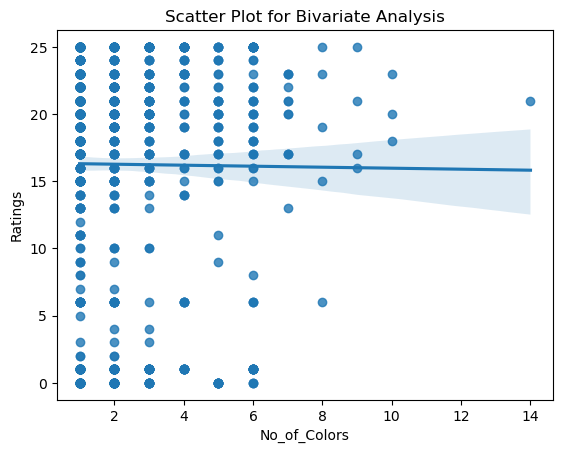

In [114]:
sns.regplot(x='No_of_Colors', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

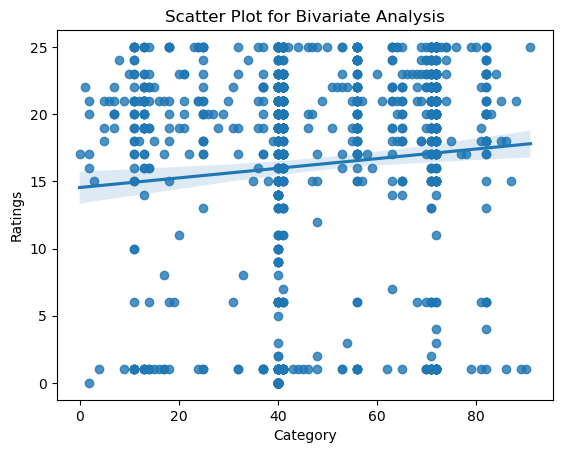

In [115]:
sns.regplot(x='Category', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

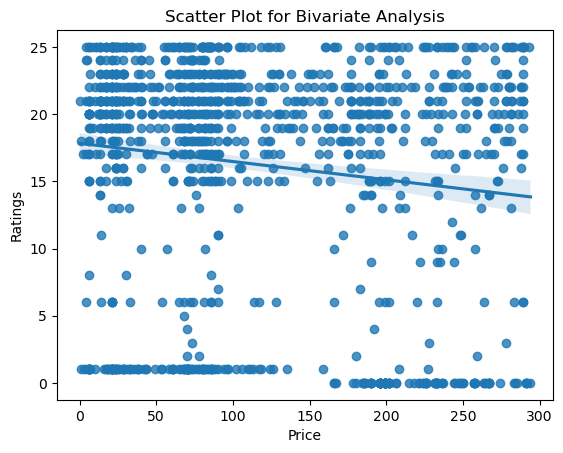

In [116]:
sns.regplot(x='Price', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

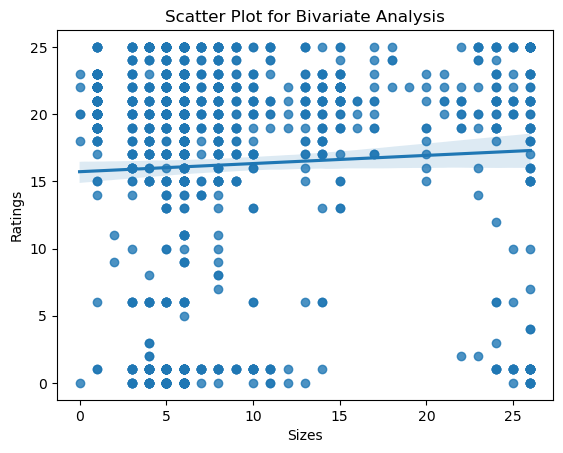

In [117]:
sns.regplot(x='Sizes', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

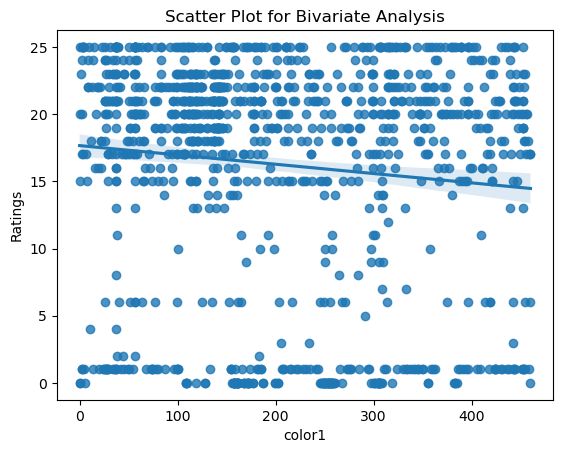

In [118]:
sns.regplot(x='color1', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

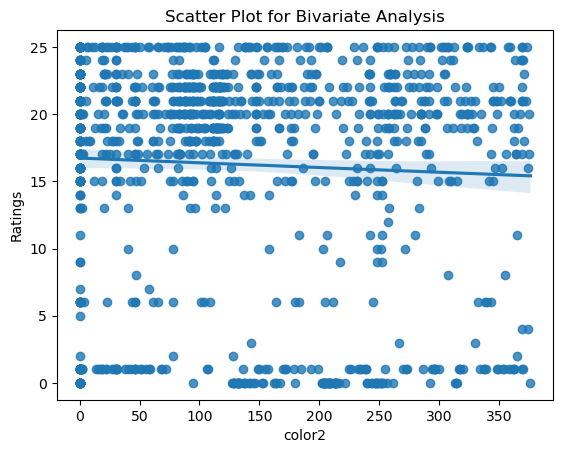

In [119]:
sns.regplot(x='color2', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

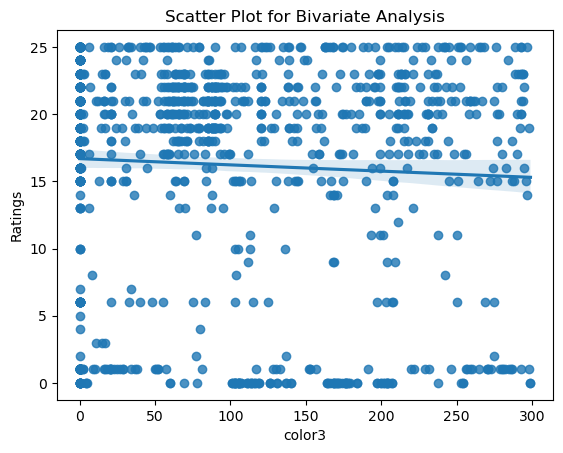

In [120]:
sns.regplot(x='color3', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

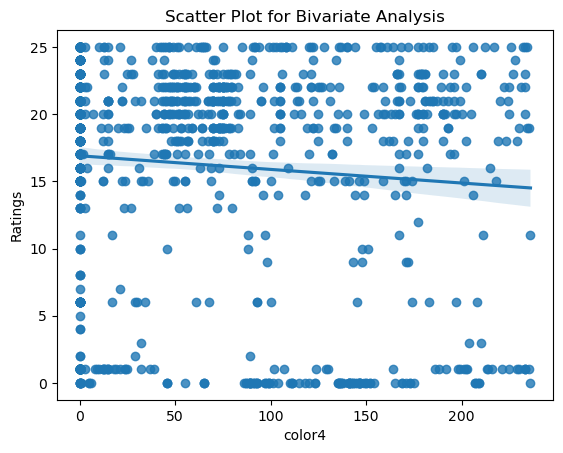

In [121]:
sns.regplot(x='color4', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

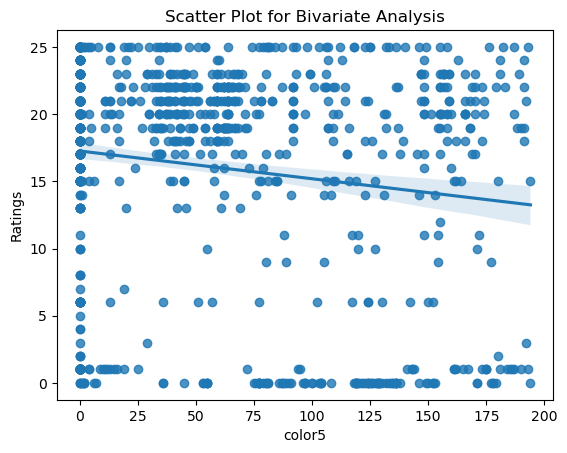

In [122]:
sns.regplot(x='color5', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

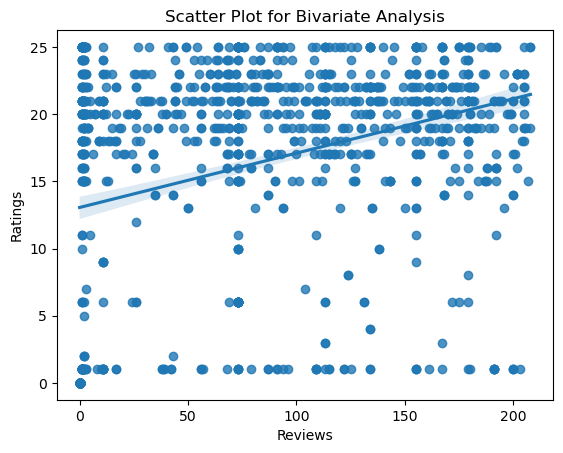

In [123]:
sns.regplot(x='Reviews', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

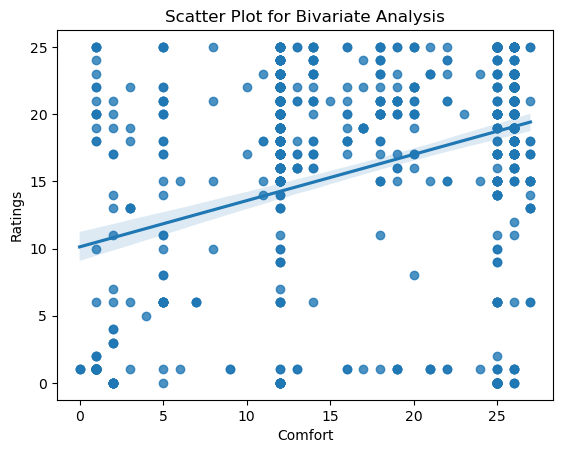

In [124]:
sns.regplot(x='Comfort', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

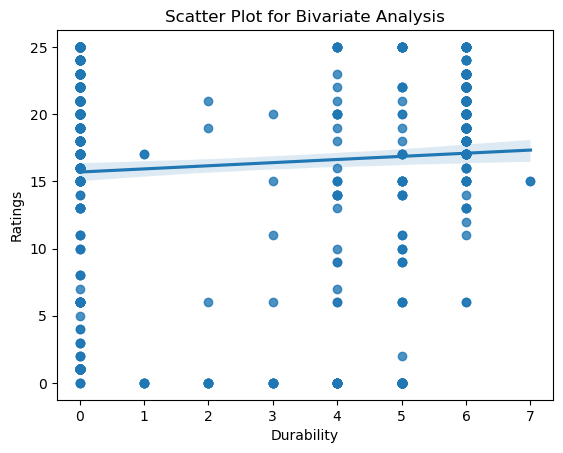

In [125]:
sns.regplot(x='Durability', y='Ratings', data=df_)
plt.title('Scatter Plot for Bivariate Analysis')
plt.show()

In [126]:
#Let's remove the outliers from the dataset

In [127]:
df_Z = df_.iloc[:,0:-1]

In [128]:
df_Z.columns

Index(['No_of_Colors', 'Category', 'Price', 'Sizes', 'color1', 'color2',
       'color3', 'color4', 'color5', 'Reviews', 'Comfort', 'Durability'],
      dtype='object')

In [129]:
Z= np.abs(zscore(df_Z))

In [130]:
print(np.where(Z>3))

(array([ 132,  150,  152,  159,  178,  185,  200,  237,  300,  407,  575,
        576, 1148], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [144]:
#Let's create a new df by removing all the outliers
DF= df_[(Z<3).all(axis=1)]

In [145]:
#Let's check the skewness of the dataset
DF.skew()

No_of_Colors    1.542539
Category       -0.130973
Price           0.516547
Sizes           1.305447
color1          0.398343
color2          0.501874
color3          0.655554
color4          0.827395
color5          0.938124
Reviews         0.266757
Comfort        -0.641676
Durability      0.314861
Ratings        -1.001817
dtype: float64

In [155]:
#Removing the skewness of 'No_of_colors'
DF.loc[:, 'No_of_Colors'] = np.log1p(DF['No_of_Colors'])
DF['No_of_Colors'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\3919737792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc[:, 'No_of_Colors'] = np.log1p(DF['No_of_Colors'])


0.4906122362405596

In [156]:
#Removing the skewness of 'color3'
DF.loc[:, 'color3'] = np.sqrt(DF['color3'])
DF['color3'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\4115326211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc[:, 'color3'] = np.sqrt(DF['color3'])


-0.10349686783057517

In [157]:
#Removing the skewness of 'color4'
DF.loc[:, 'color4'] = np.sqrt(DF['color4'])
DF['color4'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\2155710453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc[:, 'color4'] = np.sqrt(DF['color4'])


0.13123650146349292

In [158]:
#Removing the skewness of 'color3'
DF.loc[:, 'color5'] = np.sqrt(DF['color5'])
DF['color5'].skew()

C:\Users\vaddi\AppData\Local\Temp\ipykernel_25084\792503067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc[:, 'color5'] = np.sqrt(DF['color5'])


0.2913521454822163

In [163]:
DF.shape

(1147, 13)

In [164]:
#Let's divide the data into the x and y variables for test train split
X1= DF.iloc[:,0:-1]

In [166]:
y= DF.iloc[:,-1]

<AxesSubplot:>

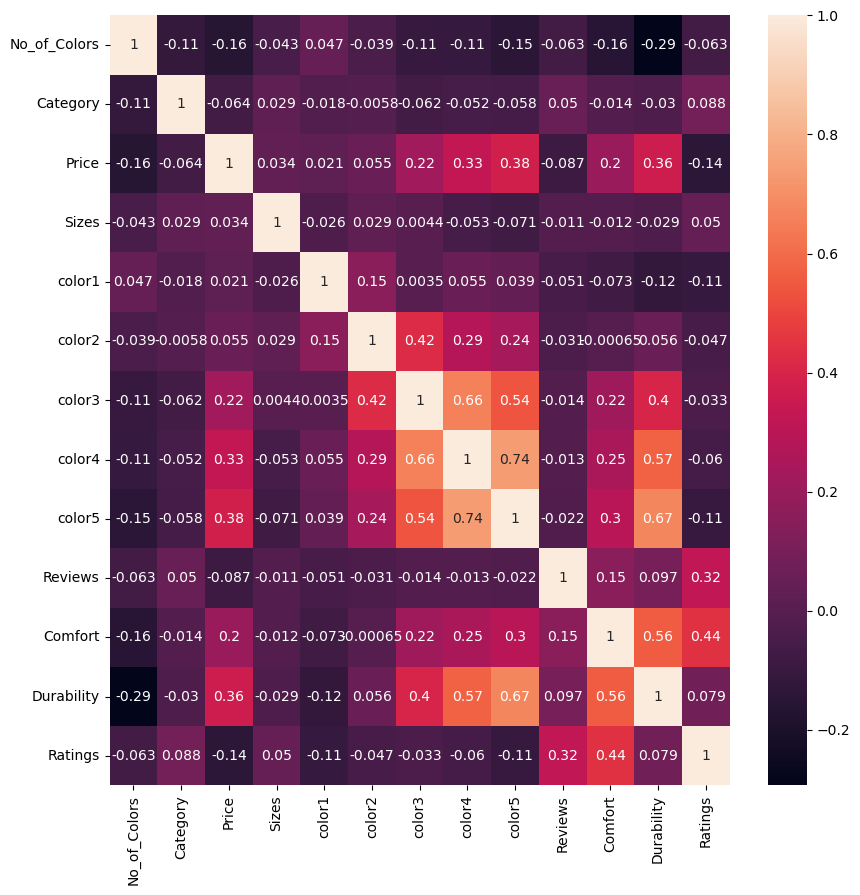

In [168]:
corr = DF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

In [169]:
#Lets apply the standard scaler to the X1 data to reduce the Multicollinearity
ss= StandardScaler()
x=ss.fit_transform(X1)

In [170]:
#Creating a function to apply different models to the dataset in multiple random states and check the R2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [171]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [172]:
#using Decision Trees
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
maxr2_score(dtr,x,y)

r2 score corresponding to  42  is  0.34046129007908665
r2 score corresponding to  43  is  0.13933428578110296
r2 score corresponding to  44  is  0.2448721434607385
r2 score corresponding to  45  is  0.4156778700073167
r2 score corresponding to  46  is  0.08990612319430225
r2 score corresponding to  47  is  0.1651155283305904
r2 score corresponding to  48  is  0.3140354891952636
r2 score corresponding to  49  is  0.21907390936589943
r2 score corresponding to  50  is  0.303849827528451
r2 score corresponding to  51  is  0.27933668751671026
r2 score corresponding to  52  is  0.3605981901244045
r2 score corresponding to  53  is  0.2251407884922546
r2 score corresponding to  54  is  0.18556053879489665
r2 score corresponding to  55  is  0.19764058356600567
r2 score corresponding to  56  is  0.21132971932276534
r2 score corresponding to  57  is  0.2794810394651197
r2 score corresponding to  58  is  0.2977602532319167
r2 score corresponding to  59  is  0.327318281134626
r2 score corresponding

66

The maximum R2_score obtained using Decision Tree is 45 at random state 66

In [173]:
#Lets chcek KNN
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 10}

In [174]:
knr=KNeighborsRegressor(n_neighbors=10)
maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.4166484093459345
r2 score corresponding to  43  is  0.43353453260964314
r2 score corresponding to  44  is  0.3684752094861101
r2 score corresponding to  45  is  0.47528250355823154
r2 score corresponding to  46  is  0.2233361831785785
r2 score corresponding to  47  is  0.2799105163642618
r2 score corresponding to  48  is  0.33742205300495165
r2 score corresponding to  49  is  0.34418955177753296
r2 score corresponding to  50  is  0.30747829393497694
r2 score corresponding to  51  is  0.4079428837734247
r2 score corresponding to  52  is  0.2966773660950852
r2 score corresponding to  53  is  0.41996001302767794
r2 score corresponding to  54  is  0.43664655387570817
r2 score corresponding to  55  is  0.33798865886791596
r2 score corresponding to  56  is  0.4333639696901084
r2 score corresponding to  57  is  0.4097882787968654
r2 score corresponding to  58  is  0.2706292840581299
r2 score corresponding to  59  is  0.4336722330719417
r2 score correspondi

77

The maximum r2 score obtained using KNeighbors Regressor and GridSearchCV is 50 at random state 77

In [175]:
#lets use ensemble model Random forets
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [176]:

rfr=RandomForestRegressor(n_estimators=100)
maxr2_score(rfr,x,y)

r2 score corresponding to  42  is  0.6019664745447073
r2 score corresponding to  43  is  0.5707001801253064
r2 score corresponding to  44  is  0.5730970409144728
r2 score corresponding to  45  is  0.6549358089422177
r2 score corresponding to  46  is  0.539657582816783
r2 score corresponding to  47  is  0.583450498387184
r2 score corresponding to  48  is  0.6710852956751205
r2 score corresponding to  49  is  0.5124985359180402
r2 score corresponding to  50  is  0.6287933037694766
r2 score corresponding to  51  is  0.6006035432392705
r2 score corresponding to  52  is  0.5390979588327994
r2 score corresponding to  53  is  0.5625937706553477
r2 score corresponding to  54  is  0.5974945274956324
r2 score corresponding to  55  is  0.5942713777333519
r2 score corresponding to  56  is  0.5267775786538671
r2 score corresponding to  57  is  0.5642090314280732
r2 score corresponding to  58  is  0.5537881772137732
r2 score corresponding to  59  is  0.6542742967398774
r2 score corresponding to  60 

94

The maximum r2 score obtained using RandomForest Regressor and GridSearchCV is 72 at random state 94

In [177]:
print("Decision Tree\n\n")
model_evaluation(dtr,x,y)

Decision Tree


Mean r2 score for regressor:  -0.8028357259351135
standard deviation in r2 score for regressor:  0.8784142466762117
[-0.36184188 -0.13153072  0.13347756 -2.17199216 -1.48229143]


In [179]:
print("Random Forest")
model_evaluation(rfr,x,y)

Random Forest


Mean r2 score for regressor:  0.0403401458216464
standard deviation in r2 score for regressor:  0.539254369131187
[ 0.41725861  0.07851135  0.59282072  0.07478323 -0.96167317]


In [181]:

#Based on above scores we will choose random forest as our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 94,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [182]:
#Lets find the rmse and r2_score using sklearn.metrics for random forest model
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r2_score is: ",r2_score(y_test,y_pred))

MSE is:  22.71208
r2_score is:  0.7152566117151876


# Saving the Model

In [183]:
import joblib
filename = 'RandomForestRegressor.pkl'
joblib.dump(rfr, filename)
print(f'Model saved as {filename}')

Model saved as RandomForestRegressor.pkl
